In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import *
from sklearn.metrics import accuracy_score,confusion_matrix



D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [46]:
df=pd.read_csv("D:/DS/AI ML DL/Let'sUpgrade/Class Materials/day 24/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
le=preprocessing.LabelEncoder()
le.fit(df['Sex'])
df['Sex']=le.transform(df['Sex'])
le.fit(df['Embarked'])
df['Embarked']=le.transform(df['Embarked'])

In [48]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [49]:
df1=df.drop(['Name','Ticket','Cabin','PassengerId'],axis=1)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [50]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [51]:
df1.count()

Survived    889
Pclass      889
Sex         889
Age         889
SibSp       889
Parch       889
Fare        889
Embarked    889
dtype: int64

In [52]:
# Total count is 889 so Test count=
889*0.3

266.7

In [53]:
# & Train count =
889*0.7

622.3

In [54]:
from sklearn import neighbors

In [55]:
x = df1.drop(['Pclass'], axis=1)

In [56]:
y=df1['Pclass']

In [57]:
def knn(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state=0)
    score=[]
    k=[]   

    for i in range(1,268):
        knn=neighbors.KNeighborsClassifier(n_neighbors=i)
        k.append(i)
        accuracy=knn.fit(x_train,y_train).score(x_test,y_test)
        score.append(accuracy)
        y_pred=knn.predict(x_test)
        cmat=confusion_matrix(y_test, y_pred)
        print("k=",i)
        print("Score=",accuracy)
        print("Confusion Matrix=\n",cmat)
        print("----------------------------------------------------------------------------------------------------------")
    return k,score
       
k,score=knn(x,y)

k= 1
Score= 0.8913857677902621
Confusion Matrix=
 [[ 62   6   2]
 [  3  37   9]
 [  1   8 139]]
----------------------------------------------------------------------------------------------------------
k= 2
Score= 0.8651685393258427
Confusion Matrix=
 [[ 67   2   1]
 [  8  37   4]
 [  4  17 127]]
----------------------------------------------------------------------------------------------------------
k= 3
Score= 0.8651685393258427
Confusion Matrix=
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]
----------------------------------------------------------------------------------------------------------
k= 4
Score= 0.8239700374531835
Confusion Matrix=
 [[ 61   7   2]
 [  8  30  11]
 [  4  15 129]]
----------------------------------------------------------------------------------------------------------
k= 5
Score= 0.8314606741573034
Confusion Matrix=
 [[ 58  10   2]
 [  7  28  14]
 [  3   9 136]]
--------------------------------------------------------------------------------------------

k= 43
Score= 0.7827715355805244
Confusion Matrix=
 [[ 61   6   3]
 [  7  19  23]
 [  7  12 129]]
----------------------------------------------------------------------------------------------------------
k= 44
Score= 0.7865168539325843
Confusion Matrix=
 [[ 61   7   2]
 [  7  20  22]
 [  7  12 129]]
----------------------------------------------------------------------------------------------------------
k= 45
Score= 0.7827715355805244
Confusion Matrix=
 [[ 61   7   2]
 [  7  19  23]
 [  7  12 129]]
----------------------------------------------------------------------------------------------------------
k= 46
Score= 0.7865168539325843
Confusion Matrix=
 [[ 61   7   2]
 [  7  20  22]
 [  7  12 129]]
----------------------------------------------------------------------------------------------------------
k= 47
Score= 0.7752808988764045
Confusion Matrix=
 [[ 61   6   3]
 [  7  17  25]
 [  7  12 129]]
---------------------------------------------------------------------------------------

k= 84
Score= 0.7528089887640449
Confusion Matrix=
 [[ 55   5  10]
 [  5  10  34]
 [  5   7 136]]
----------------------------------------------------------------------------------------------------------
k= 85
Score= 0.7490636704119851
Confusion Matrix=
 [[ 55   6   9]
 [  5  10  34]
 [  5   8 135]]
----------------------------------------------------------------------------------------------------------
k= 86
Score= 0.7490636704119851
Confusion Matrix=
 [[ 55   6   9]
 [  5  10  34]
 [  5   8 135]]
----------------------------------------------------------------------------------------------------------
k= 87
Score= 0.7490636704119851
Confusion Matrix=
 [[ 55   6   9]
 [  5  10  34]
 [  5   8 135]]
----------------------------------------------------------------------------------------------------------
k= 88
Score= 0.7453183520599251
Confusion Matrix=
 [[ 54   6  10]
 [  5  10  34]
 [  5   8 135]]
---------------------------------------------------------------------------------------

k= 125
Score= 0.7453183520599251
Confusion Matrix=
 [[ 53  12   5]
 [  5  11  33]
 [  5   8 135]]
----------------------------------------------------------------------------------------------------------
k= 126
Score= 0.7490636704119851
Confusion Matrix=
 [[ 53  12   5]
 [  5  11  33]
 [  5   7 136]]
----------------------------------------------------------------------------------------------------------
k= 127
Score= 0.7490636704119851
Confusion Matrix=
 [[ 53  12   5]
 [  5  11  33]
 [  5   7 136]]
----------------------------------------------------------------------------------------------------------
k= 128
Score= 0.7528089887640449
Confusion Matrix=
 [[ 53  12   5]
 [  5  11  33]
 [  5   6 137]]
----------------------------------------------------------------------------------------------------------
k= 129
Score= 0.7528089887640449
Confusion Matrix=
 [[ 53  12   5]
 [  5  11  33]
 [  5   6 137]]
----------------------------------------------------------------------------------

k= 165
Score= 0.7528089887640449
Confusion Matrix=
 [[ 52   9   9]
 [  5   6  38]
 [  5   0 143]]
----------------------------------------------------------------------------------------------------------
k= 166
Score= 0.7528089887640449
Confusion Matrix=
 [[ 52   8  10]
 [  5   6  38]
 [  5   0 143]]
----------------------------------------------------------------------------------------------------------
k= 167
Score= 0.7528089887640449
Confusion Matrix=
 [[ 52   7  11]
 [  5   6  38]
 [  5   0 143]]
----------------------------------------------------------------------------------------------------------
k= 168
Score= 0.7528089887640449
Confusion Matrix=
 [[ 52   7  11]
 [  5   6  38]
 [  5   0 143]]
----------------------------------------------------------------------------------------------------------
k= 169
Score= 0.7528089887640449
Confusion Matrix=
 [[ 52   6  12]
 [  5   6  38]
 [  5   0 143]]
----------------------------------------------------------------------------------

k= 205
Score= 0.7228464419475655
Confusion Matrix=
 [[ 48   6  16]
 [  4   2  43]
 [  5   0 143]]
----------------------------------------------------------------------------------------------------------
k= 206
Score= 0.7228464419475655
Confusion Matrix=
 [[ 48   6  16]
 [  4   2  43]
 [  5   0 143]]
----------------------------------------------------------------------------------------------------------
k= 207
Score= 0.7228464419475655
Confusion Matrix=
 [[ 48   6  16]
 [  4   2  43]
 [  5   0 143]]
----------------------------------------------------------------------------------------------------------
k= 208
Score= 0.7228464419475655
Confusion Matrix=
 [[ 48   6  16]
 [  4   2  43]
 [  5   0 143]]
----------------------------------------------------------------------------------------------------------
k= 209
Score= 0.7228464419475655
Confusion Matrix=
 [[ 48   6  16]
 [  4   2  43]
 [  5   0 143]]
----------------------------------------------------------------------------------

k= 245
Score= 0.7191011235955056
Confusion Matrix=
 [[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
----------------------------------------------------------------------------------------------------------
k= 246
Score= 0.7191011235955056
Confusion Matrix=
 [[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
----------------------------------------------------------------------------------------------------------
k= 247
Score= 0.7191011235955056
Confusion Matrix=
 [[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
----------------------------------------------------------------------------------------------------------
k= 248
Score= 0.7191011235955056
Confusion Matrix=
 [[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
----------------------------------------------------------------------------------------------------------
k= 249
Score= 0.7191011235955056
Confusion Matrix=
 [[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
----------------------------------------------------------------------------------

Text(0, 0.5, 'Accuracy score')

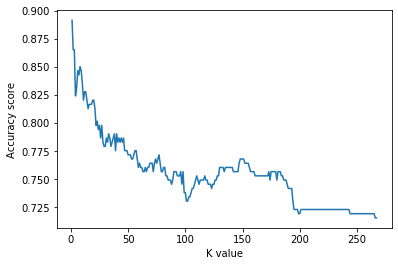

In [61]:
plt.plot(k,scores)
plt.xlabel("K value")
plt.ylabel("Accuracy score")

### For k=1 Accuracy is 89,13%
### For k=2 & 3 Accuracy is 86.5%
### For k=4-267 Accuracy is less than 86%